## 총점 및 순위 계산

### 1. 읽어들일 파일명 지정 ==> 가지고 있는 파일명으로 수정필요

In [20]:
########### file_name 선언 ##################################
전처리데이터셋 = '집계구_변수_최종.csv'
##########################################################

### 2. 화면에 출력되는 칼럼명을 확인한 후, 필요한 칼럼명을 복사하여 붙여넣기 (수정 불필요)

In [21]:
import pandas as pd
df = pd.read_csv(f'{전처리데이터셋}', header=0, encoding='cp949', engine='python')
df.set_index('TOT_REG_CD', inplace=True)
전체칼럼 = df.columns.tolist()
print ("여기 칼럼명을 확인하신 후 점수계산에 필요한 칼럼명만 복사 하세요.\n", 전체칼럼)

여기 칼럼명을 확인하신 후 점수계산에 필요한 칼럼명만 복사 하세요.
 ['area', 'density', 'value', 'workman', 'marketNum', 'restaurant', 'distan', 'riverNum', 'parkNum', 'waterNum']


### 3. 하단에 있는 "점수칼럼"에 점수로 환산할 대상인 칼럼을 수정하도록 함 ==> 수정 필요

In [22]:
점수칼럼 =  ['area','density','value', 'workman', 'marketNum', 'restaurant', 'distan', 'riverNum', 'parkNum', 'waterNum']
print("입력한 점수컬럼명은 다음과 같음\n", 점수칼럼)

가중치 = [1] * len(점수칼럼)
가중치

입력한 점수컬럼명은 다음과 같음
 ['area', 'density', 'value', 'workman', 'marketNum', 'restaurant', 'distan', 'riverNum', 'parkNum', 'waterNum']


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

### 4. 건물 가중치 선언 ==> 필요시 수정
- 각 건물과 관광지에 대한 가중치를 수기로 선언함
- 필요시 가중치 조절 하십시오 
- 필요시 가중치 추가 또는 삭제 하십시오

In [23]:
#점수칼럼  순서대로 점수칼럼 갯수만큼 가중치를 입력하십시오

#예를들어 이렇게 가중치를 주고 싶을 경우에는
#건물1가중치=1
#건물2가중치 = 2
#건물3가중치  = 3
#관광지가중치=1
#도서관가충치=1
#경제인구가중치=1
#전기차가중치=1
#아래 처럼 입력합니다.

##### 여기만 수정하면 됩니다 ###############################
가중치 = [1,2,1,2,1,2,2,3,3,3]      # 점수칼럼 갯수 만큼, 구분은 쉼표
##### 여기만 수정하면 됩니다 ###############################


# 수정 불필요
if (len(가중치) != len(점수칼럼)):
    print("입력한 가중치 갯수가 점수칼럼 갯수와 다르므로 확인후 다시 입력 바랍니다")
else:
    print("다음 줄을 실행 하세요")

다음 줄을 실행 하세요


### 5. 이하 별도 언급 시까지 수정 불필요
- 6.1에서 수정 필요

In [27]:
df = pd.read_csv(f'{전처리데이터셋}', header=0, encoding='cp949', engine='python')
df.set_index('TOT_REG_CD', inplace=True)

################## QGIS에서 작업한 전처리 결과 CSV 읽기 ####################################################
pre_process_set = pd.read_csv(f'{전처리데이터셋}', header=0, encoding='cp949', engine='python')
pre_process_set = pre_process_set[['TOT_REG_CD','area','density', 'value', 'workman', 'marketNum', 'restaurant', 'distan', 'riverNum', 'parkNum', 'waterNum']]
pre_process_set = pre_process_set.sort_values(by='TOT_REG_CD')

# Null 이 있을 수 있는 칼럼은 Null을 0로 변경
pre_process_set.fillna(0, inplace=True)
##################  QGIS에서 작업한 전처리 결과 CSV 읽기 끝###################################################

################## MinMax정규화 ##########################################################################
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# 점수칼럼 정규화
norm = pre_process_set.copy()
norm.fillna(0, inplace=True)
norm.set_index('TOT_REG_CD', inplace=True)

norm[점수칼럼] = scaler.fit_transform(norm.loc[:,점수칼럼])
norm.reset_index(inplace=True)
################## 정규화 끝################################################################################


# 총점 계산
df = norm.copy()

for i in range(0, len(점수칼럼)):
    name = 점수칼럼[i]
    df[name] = df[name] * 가중치[i] 

df.set_index(['TOT_REG_CD'], inplace=True)

df['sum'] = df.sum(1)
df.reset_index(inplace=True)

# 등수 계산 
df['순위'] = df['sum'].rank(method='dense', ascending=False).astype(int)

final = df.sort_values(by='순위')
final.reset_index(drop=True, inplace=True)

# 상위 20개만 학인
display("결과", final.head(20))

# 최종 결과 CSV 파일쓰기
final.to_csv('결과_총점.csv', index=False, sep=',', encoding='cp949')

'결과'

,TOT_REG_CD,area,density,value,workman,marketNum,restaurant,distan,riverNum,parkNum,waterNum,sum,순위
0,1117071010001,0.983871,0.007117,0.299013,2.000000,0.0,1.222222,0.000988,2.25,0.75,0.0,7.513212,1
1,1117056010002,0.187761,0.035587,0.256971,0.341463,0.0,1.085470,0.001603,3.00,0.75,0.0,5.658856,2
2,1117073030001,0.872125,0.007117,0.130416,1.414634,0.0,0.025641,0.003156,0.75,2.25,0.0,5.453091,3
3,1117056030003,0.105827,0.071174,0.308022,0.341463,0.0,0.051282,0.001694,3.00,1.50,0.0,5.379463,4
4,1117064010012,0.196595,0.021352,0.151437,0.195122,0.0,0.042735,0.002693,0.75,0.75,3.0,5.109934,5
5,1117052010003,0.609794,0.007117,0.154440,1.024390,0.0,0.008547,0.000680,0.00,0.00,3.0,4.804969,6
6,1117065010001,0.426820,0.014235,0.200343,0.390244,0.0,0.000000,0.001003,1.50,1.50,0.0,4.032645,7
7,1117071030013,0.066252,0.064057,0.184041,0.390244,0.0,0.145299,0.000753,0.00,0.00,3.0,3.850646,8
8,1117073032001,0.335669,0.007117,0.146289,0.341463,0.0,0.000000,0.001849,0.00,3.00,0.0,3.832388,9
9,1117051020003,0.132130,0.035587,0.195195,0.341463,0.0,0.051282,0.001448,0.00,0.00,3.0,3.757106,10


## 6. 지도로 보기
- 인터넷 환경이 안되면 생략

### 6.1 지도로 보기 선택 사항
- 상단에서 도출된 결과값들 중에서 상위 3개만 지도로 보여주기
- Google Map 처럼 보여지며, 마우스로 스크롤하면 지도 크기가 Zoom 됨
- 이를 위해서 Anaconda Promprt 창을 열고 아래 함수를 복사하여 그대로 엔터
 - pip install folium

#### 수정 필요 - 수정 안하면 상위 20개를 조회

In [ ]:
# 보고 싶은 상위권 갯수를 입력하세요
지도보기갯수 = 20   # 보고싶은 상위권 갯수를 여기에 입력, 만약 3이면 최상위 3개만 보겠다는 의미

### 6.2 수정 불필요

In [ ]:
# 지도로 보여주기
import folium
print(f"보고자 하는 상위권 갯수는 {지도보기갯수}개 입니다.")
for i in range(지도보기갯수):
    지도보기 = folium.Map(location=[final.loc[i,'lat'],final.loc[i,'lon']], zoom_start = 15)
    folium.Marker([final.loc[i,'lat'],final.loc[i,'lon']]).add_to(지도보기)
    print (final.loc[i,'lat'],final.loc[i,'lon'])
    j = i+1
    display(f'상위 {j}번째 격자의 센터 위치 보기', 지도보기)

### 6. Box Plot 보기 선택 사항 - 수정 불필요
- 상기 선택사항 실행여부와 무관하게 9번은 실행가능함
- 값들이 몇점대에 몰려 있는지 확인해보는 Box Plot 그래프
- 맨 하단부에 몰려 있을 가능성이 높음. 이유는 절반이상이 0점이기 때문

In [14]:
#참고) 총점 분포도
import matplotlib.pyplot as plt

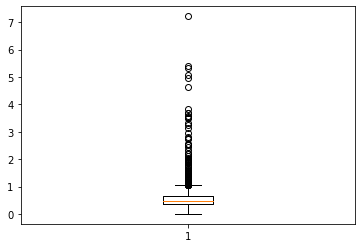

In [15]:
plt.figure()
plt.boxplot(final['sum'])
plt.show()

끝